In [6]:
import pandas as pd
import statsmodels.api as sm

data_dir = "../sheet0_one_hot.csv"

data = pd.read_csv(data_dir)

X = data.drop(columns=['id','weathered'])
y = data['weathered']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              weathered   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     5.595
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           1.31e-05
Time:                        09:20:36   Log-Likelihood:                -16.593
No. Observations:                  58   AIC:                             57.19
Df Residuals:                      46   BIC:                             81.91
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4918      0.109      4.

/home/cqy/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


findfont: Font family ['Debian'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Debian'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Debian'] not found. Falling back to DejaVu Sans.
/home/cqy/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/cqy/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/cqy/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 31867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/cqy/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 25991 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/cqy/anaconda3/lib/python3.9/site-packages/matplotlib/ba

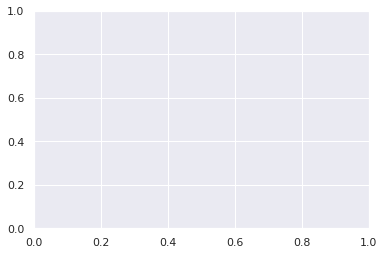

In [9]:
import pandas as pd
import seaborn as sns
import os

sheet0 = pd.read_csv('../sheet0_num.csv')
sheet1 = pd.read_csv('../sheet1_1.csv')

sheet0 = sheet0.drop(columns=["ornament", "color"])
sheet1 = sheet1.drop(columns=["weathered",]).fillna(0)

data = sheet0.merge(sheet1, left_on='id', right_on='id')

type_match = {
    0 : '铅钡',
    1 : '高钾',
}

degree_match = {
    0 : '无风化',
    1 : '风化',
}

plot_columns = ['sio', 'nao', 'ko', 'cao', 'mgo', 'alo', 'feo', 'cuo', 'pbo', 'bao', 'po', 'sro', 'sno', 'so']
matcher = {
    "sio": "二氧化硅(SiO2)",
    "nao": "氧化钠(Na2O)"  ,
    "ko" : "氧化钾(K2O)"   ,
    "cao": "氧化钙(CaO)"   , 
    "mgo": "氧化镁(MgO)"   ,
    "alo": "氧化铝(Al2O3)" ,
    "feo": "氧化铁(Fe2O3)" ,
    "cuo": "氧化铜(CuO)"   ,
    "pbo": "氧化铅(PbO)"   ,
    "bao": "氧化钡(BaO)"   ,
    "po" : "五氧化二磷(P2O5)",
    "sro": "氧化锶(SrO)"   ,
    "sno": "氧化锡(SnO2)"  ,
    "so" : "二氧化硫(SO2)" ,
}

os.system('rm ./plots/*')

sns.set(font='Debian')

for type_ in range(2):
    for col in plot_columns:
        data0 = data[data.type == type_]
        plot = sns.violinplot(data=data0, x='degree', y=col)
        plot.set_title(f'{type_match[type_]}类文物风化前后{matcher[col]}含量分布对比图', fontsize=18, position=(0.5,1.05))
        plot.get_figure().savefig(f'./plots/{type_match[type_]}类文物风化前后{matcher[col]}含量分布对比图.png', dpi=400)
        plot.clear()
        